--------------------------------------------------------------------------------
## **Niloufar Abbasi**
#### **401209996**
#### Deep Learning - Homework 1
--------------------------------------------------------------------------------

#introduction to machine learning
##pca analysis on MNIST dataset

--------------------------------------------------------------------------------
توضیحات هر قسمت از کد به صورت کامنت های تک خطی یا کامنت های چند خطی درون هر سلول نوشته شده است. با تشکر از لطف و توجه شما.

--------------------------------------------------------------------------------

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name     = "Niloufar"
last_name      = "Abbasi"
student_number = "401209996"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
# importing required libraries
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
#---------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score
from sklearn.decomposition   import PCA
#----------------------------------------------------
from prettytable             import PrettyTable

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set and fill nan value with 0
# TODO (load dataset)

from keras.datasets import mnist                                                #loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check if there are any NaN values in the dataset
if np.isnan(x_train).any() or np.isnan(y_train).any() or np.isnan(x_test).any() or np.isnan(y_test).any():
    print('NaN values found in the dataset.')                                   # Print a message indicating that there is nan values in the dataset
    x_train = np.nan_to_num(x_train)                                            # Replace NaN values with 0
    y_train = np.nan_to_num(y_train)                                            # Replace NaN values with 0
    x_test  = np.nan_to_num(x_test )                                            # Replace NaN values with 0
    y_test  = np.nan_to_num(y_test )                                            # Replace NaN values with 0
else:
    print("\nNo NaN values found in the dataset.")                              # Print a message indicating that there is no nan values in the dataset

11490434/11490434 [==============================] - 0s 0us/step

No NaN values found in the dataset.


هست ولی طبق اولین خطی که کامنت گذاشته شده بود در این سلول، جهت اططمینان این بررسی انجام شد. Nan البته اگر توضیحات این دیتاست را بخوانیم، در آن نوشته شده است که این دیتاست فاقد  



In [4]:
#shapes before flattening
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test  :", x_test.shape )
print("y_test  :", y_test.shape )

x_train : (60000, 28, 28)
y_train : (60000,)
x_test  : (10000, 28, 28)
y_test  : (10000,)


In [5]:
x_train, x_test = x_train.reshape(-1, 784), x_test.reshape(-1, 784)             # flatten the train data and the test data

In [6]:
#shapes after flattening
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test  :", x_test.shape )
print("y_test  :", y_test.shape )

x_train : (60000, 784)
y_train : (60000,)
x_test  : (10000, 784)
y_test  : (10000,)


**در قسمت های مختلف کد من سعی کردم کامنت ها و توضیحات لازم رو یک مقدار جلوتر از کامنت های عادی بنویسم تا با کامنت های اولیه که در سلول ها موجود بودند قاطی نشوند.**

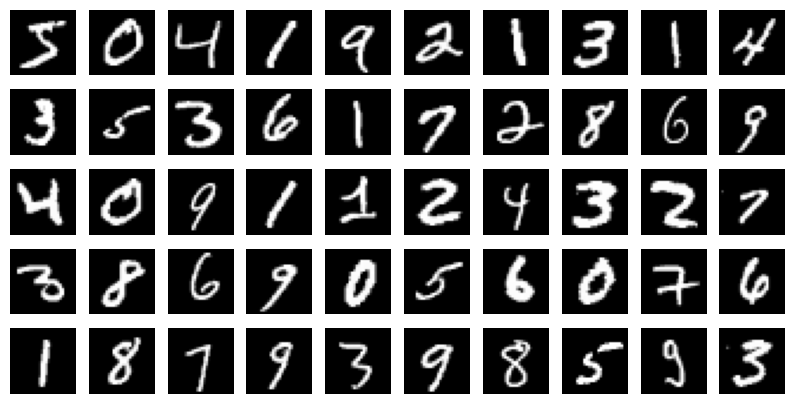

In [7]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images

    fig, axes = plt.subplots(5, 10, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i].reshape(28, 28), cmap='gray')                            #cmap='gray' specifies that the images should be displayed in grayscale.
        ax.axis('off')                                                          #This line turns off the axis (ticks and labels) for making the image display cleaner.
    plt.show()

show_images(50, x_train)


note:

In this case, I was not sure about what the question is asking for. So Im showing the first 50 images from the training set. you can replace 'x_train' with 'x_test' if you want to see some photos of test data.


In [8]:
#TODO scale the data set to [0 1]
#divide data to maximum value .

x_train_scaled = x_train / 255.0                                                # Scale the train data
x_test_scaled  = x_test  / 255.0                                                # scale the test data

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [9]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

###############################################################################################################################
#(in the next cell I calculate covariance manually because I was not sure about which one the question asks for) !!!!!!!!!!!!!#
###############################################################################################################################

cov_matrix                = np.cov(x_train_scaled.T )                           # Calculate the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)                           # Calculate the eigenvalues and eigenvectors of the covariance matrix

In [10]:
#calculating manually :

mean_vector = np.mean(x_train_scaled, axis=0)
centered_data_matrix = x_train_scaled - mean_vector                             #zero-mean
cov_matrix_manual = np.dot(centered_data_matrix.T, centered_data_matrix) / (x_train_scaled.shape[0] - 1)

eigenvalues_manual, eigenvectors_manual = np.linalg.eig(cov_matrix_manual)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [11]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO

sorted_indices      = np.argsort(eigenvalues)[::-1]                             # Sort the eigenvalues in descending order
sorted_eigenvalues  = eigenvalues[sorted_indices]

'''
note:
In linear algebra, it is commonly understood that when the eigenvalue of a matrix is larger, it signifies a higher level of importance.
Therefore, I choose to sort them in descending order.
'''

total_variance      = np.sum(sorted_eigenvalues)                                # Calculate the total variance
#in the context of PCA, the total variance of the dataset is equal to the sum of the eigenvalues of the covariance matrix.

cumulative_variance = np.cumsum(sorted_eigenvalues) / total_variance            # Find the number of components that contain the desired explained variance
k = np.argmax(cumulative_variance >= explained_variance) + 1
# the index in Python starts from 0, so adding + 1 ensures that k represents the correct number of components in the original 1-based indexing convention

compression_ratio = (x_train_scaled.shape[1] - k) / x_train_scaled.shape[1]     #calculate the compression_ratio

print("Number of components with {:.2%} explained variance: {}".format(explained_variance, k))
print("Compression ratio: {:.2%}".format(compression_ratio))

Number of components with 70.00% explained variance: 26
Compression ratio: 96.68%


In linear algebra, it is commonly understood that when the eigenvalue of a matrix is larger, it signifies a higher level of importance.
Therefore, I choose to sort them in descending order in the above cell.

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

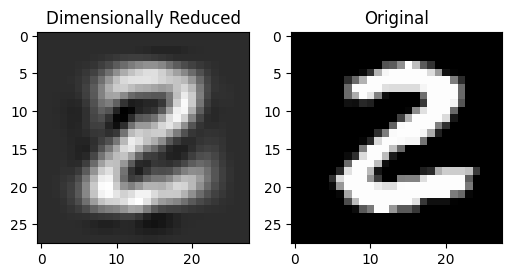

In [12]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
X_k               = np.dot(x_train_scaled, eigenvectors[:, :k] )                # Project images into reduced dimensionality eigenbasis
X_k_reconstructed = np.dot(X_k           , eigenvectors[:, :k].T)               # Reproject images to the standard basis

sample_index         = 25                                                       # Select one sample from the dataset
sample_original      = x_train_scaled[sample_index].reshape(28, 28)             #ثextract the original image data and reshape it to the original 28x28 dimensions
sample_reconstructed = X_k_reconstructed[sample_index].reshape(28, 28)          # Extract the reconstructed image data after PCA and reshape it to 28x28

#plot the dimentionally reduced data
plt.subplot(1, 2, 1)
plt.imshow (sample_reconstructed, cmap='gray')
plt.title  ("Dimensionally Reduced")

#plot the original data
plt.subplot(1, 2, 2)
plt.imshow (sample_original, cmap='gray')
plt.title  ("Original")

plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [13]:
#complete below function using python PCA function
def do_pca(n_components, data):
    #input number of component and not normalized data set.
    #output is the projected dataset
    # TODO
    cov_matrix                = np.cov(data.T )                                 # calculate the covariance matrix   (we did this before and explain this before)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)                       # Calculate eigenvalues and eigenvectors o cov matrix
    sorted_indices            = np.argsort(eigenvalues)[::-1]                   # Sort the eigenvectors based on the eigenvalues
    sorted_eigenvectors       = eigenvectors[:, sorted_indices]

    selected_eigenvectors     = sorted_eigenvectors[:, :n_components]           # Select the top k eigenvectors

    projected_data            = np.dot(data, selected_eigenvectors)             # Project the data onto the selected eigenvectors

    return projected_data

In [14]:
X = (np.concatenate((x_train_scaled, x_test_scaled)))
y = (np.concatenate((y_train, y_test)))
# این کار رو برای این انجام دادم که بتونم کل دیتارو یک جا بدم به مدل و همه ی کار هارو داخل مدل انجام بدم.
# در این صورت همه چی خیلی خیلی ساده تر میشه

In [15]:
X.shape

(70000, 784)

لطفا توجه کنید که من دو سلول بعدی خواسته شده را به صورت یکجا درون مدل انجام دادم و هیچ قسمتی از سوال جا نیفتاده و این کار را به خاطر این انجام دادم که همه چیز اینطوری ساده تر میشه
برداشت من از صحبت های تی ای محترم درس درون گروه درسی هم این بود که اجازه این کار را داریم. توضیحات مربوط به هر خط از کد نوشته شده به صورت کامنت جلوی آن خط آورده شده است.

In [16]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    test_acc_list = []                                                          # making an empty list for appendin test accuracy for each pc
    pc_list       = []                                                          # an empty list for appending each pc because i need that to make a table in the next cell

    model = LogisticRegression(max_iter=500, solver='lbfgs')                    # Create an instance of the logistic regression model
#-------------------------------------------------------------------------------
    for pc in range (2,101):                                                    # it's the part of next cell which i prefered to do it here in the model !!!!

        pca = PCA(n_components=pc)                                              ##utilizing PCA based on approval from the TA. (it is possible to use do_pca instead)
        x_train_projected = pca.fit_transform(X[:60000])                        # First 60000 samples for training
        x_test_projected  = pca.transform(X[60000:70000])
        y_train_2 = y[:60000]                                                   # First 60000 labels for training
        y_test_2  = y[60000:70000]                                              #I add 2 to the names because i concateate them and split them again in this part

        model.fit(x_train_projected, y_train_2)                                 # Train the model
              # Project the test data using the same PCA transformation
        y_pred_on_test = model.predict(x_test_projected)                        # Predict the labels for the test data
        test_acc = accuracy_score(y_test, y_pred_on_test)                       # Calculate the accuracy of the model
        test_acc_list.append(test_acc)                                          #appending the accuracy which is calculated
        pc_list.append(pc)

    return pc_list, test_acc_list



In [17]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO

acc_list, pc_list = [], []
for pc in range(2,101):
    #TODO
    pass
####################################################################################
# این سلول از کد را به صورت ترکیبی با سلول بالا نوشتم و آن را وارد مدل کردم
# لطفا جهت بررسی آن به سلول قبل توجه کنید. تشکر
#نتایج این بخش در سلول زیر چاپ شده است
####################################################################################

In [18]:
# را در چند سلول قبل با کمک کانکتینیشن ایجاد کردیم  X , y

PC_LIST, TEST_ACC_LIST = ML_model(X,y, print_output = True)
print(PC_LIST)
print(TEST_ACC_LIST)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0.4462, 0.476, 0.5777, 0.6874, 0.7375, 0.7658, 0.7904, 0.795, 0.8091, 0.8104, 0.8322, 0.8393, 0.8462, 0.8496, 0.8568, 0.8643, 0.868, 0.8742, 0.8804, 0.8819, 0.8839, 0.8898, 0.8915, 0.8916, 0.8927, 0.8936, 0.894, 0.8953, 0.8962, 0.8966, 0.9009, 0.9023, 0.9022, 0.9037, 0.9039, 0.9061, 0.9063, 0.9066, 0.9071, 0.907, 0.9094, 0.9104, 0.9106, 0.9111, 0.912, 0.9129, 0.9138, 0.912, 0.9126, 0.9128, 0.9132, 0.9142, 0.9141, 0.9161, 0.9155, 0.917, 0.9171, 0.9167, 0.9161, 0.9166, 0.9165, 0.9164, 0.9169, 0.9176, 0.9177, 0.9165, 0.9163, 0.9166, 0.9176, 0.9178, 0.9175, 0.9184, 0.9187, 0.9178, 0.9185, 0.9191, 0.9188, 0

اینجا چون گام 1 بود عملا لیست تعداد کامپوننت ها اطلاعاتی به ما اضافه نمیکنه ولی اگر این قسمت از کد را با گام های مختفی بخواهیم ران کنیم این خط کمک زیادی به ما می کند.

In [19]:
# for better understanding:

table = PrettyTable()                                                           # create a PrettyTable object
table.field_names = ["# OF COMPONENTS", "ACCURACY"]                             #add columns to the table
for item_1, item_2 in zip(PC_LIST, TEST_ACC_LIST):                              # Add data from the lists to the table
    table.add_row([item_1, item_2])
print(table)

+-----------------+----------+
| # OF COMPONENTS | ACCURACY |
+-----------------+----------+
|        2        |  0.4462  |
|        3        |  0.476   |
|        4        |  0.5777  |
|        5        |  0.6874  |
|        6        |  0.7375  |
|        7        |  0.7658  |
|        8        |  0.7904  |
|        9        |  0.795   |
|        10       |  0.8091  |
|        11       |  0.8104  |
|        12       |  0.8322  |
|        13       |  0.8393  |
|        14       |  0.8462  |
|        15       |  0.8496  |
|        16       |  0.8568  |
|        17       |  0.8643  |
|        18       |  0.868   |
|        19       |  0.8742  |
|        20       |  0.8804  |
|        21       |  0.8819  |
|        22       |  0.8839  |
|        23       |  0.8898  |
|        24       |  0.8915  |
|        25       |  0.8916  |
|        26       |  0.8927  |
|        27       |  0.8936  |
|        28       |  0.894   |
|        29       |  0.8953  |
|        30       |  0.8962  |
|       

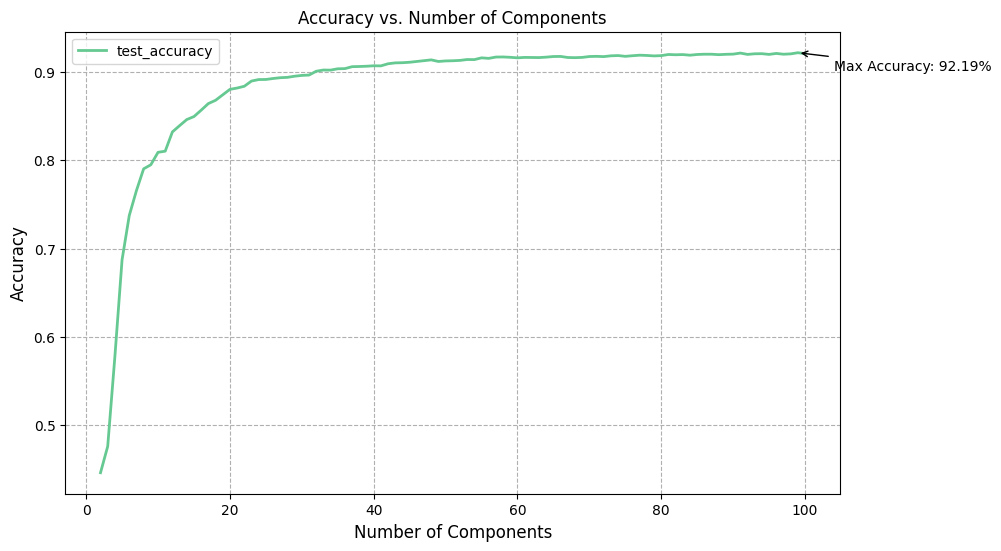

In [20]:
#plot the accuracy based on components.
#TODO

fig, ax = plt.subplots(figsize=(10, 6))                                         # Create a figure and axes objects
# Plotting the accuracy vs. number of components
plt.plot  (PC_LIST, TEST_ACC_LIST, '#66c992', linewidth=2 , label = 'test_accuracy')  # 66c992 is one of my favorite colors
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title ('Accuracy vs. Number of Components')
plt.legend()
plt.grid  (True, ls = '--')


# Find the number of components that maximize the accuracy and the corresponding maximum accuracy
max_acc_index = np.argmax(TEST_ACC_LIST)
max_acc       = TEST_ACC_LIST[max_acc_index]
optimal_pc    = PC_LIST[max_acc_index]
# Annotate the maximum accuracy point
ax.annotate('Max Accuracy: {:.2%}'.format(max_acc), xy=(optimal_pc, max_acc), xytext=(optimal_pc+5, max_acc-0.02), fontsize=10, arrowprops=dict(facecolor='#43604a', arrowstyle='->'))

plt.show()

In [21]:
#print the number of components that maximize the accuracy and the max accuracy  #i showed this in the last cell but i'm doing it again here
#TODO

max_acc_index = np.argmax(TEST_ACC_LIST)
max_acc       = TEST_ACC_LIST[max_acc_index]
optimal_pc    = PC_LIST[max_acc_index]

print("Number of components that maximize accuracy: {}".format(optimal_pc))
print("Maximum accuracy: {:.2%}".format(max_acc))

Number of components that maximize accuracy: 99
Maximum accuracy: 92.19%
